# Šikmý vrh - balistická křivka

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Odporová síla

In [2]:
def Fo(v,rho,Cd,S):
    return 0.5*rho*Cd*S*v**2

In [3]:
g = 9.82 #gravitační zrychlení m/s^2
Cd = 0.5 #součinitel odportu pro kouli v oblasti platnosti Newtonova zákona Fo ~ v^2
rho = 1.29 #hustota vzduch (kg/m^3)
mu = 2e-5 #viskozita vzduchu (Pa s)
d = 0.005 #průměr střely (5 mm)
rho_bullet = 11340 #hustota střely z olova (kg/m^3)
S = np.pi*(d/2)**2 #průřez střely
m = 4/3*np.pi*(d/2)**3*rho_bullet #hmotnost střely
v0 = 150 #počáteční rychlost střely (m/s)
alpha = 45*np.pi/180 #úhel výstřelu (45 stupňů) -> převedeno do rad.
Re = rho*d*v0/mu #Reynoldsovo číslo

In [4]:
print(f"hmotnost střely: {m*1000:4.2f} g")
print(f"Reynoldsovo číslo: {Re}")

hmotnost střely: 0.74 g
Reynoldsovo číslo: 48375.0


In [5]:
tmax = 50 #doba, po kterou šikmý vrh sledujeme (zde 50 s)
dt = 0.001 #časový krok pro numerický výpočet derivace (zde tisícina sekundy)

In [ ]:
t = np.arange(0,tmax,dt) #pole časů
x = np.empty(np.size(t)) #pole x-ových souřadnic
y = np.empty(np.size(t)) #pole y-ových souřadnic
vx = np.empty(np.size(t)) #pole x-ových složek rychlostí
vy = np.empty(np.size(t)) #pole y-ových složek rychlostí

In [7]:
v = np.empty(np.size(t)) #pole velikostí rychlostí
s = np.empty(np.size(t)) #pole uražené dráhy

In [8]:
x[0] = 0 # x-ová souřadnice v čase t = 0
y[0] = 0 # y-ová souřadnice v čase t = 0
v[0] = v0 #velikost rychlosti v čase t = 0 
vx[0] = v0*np.cos(alpha) - Fo(v0,rho,Cd,S)/m*np.cos(alpha)*dt/2 # x-ová složka rychlosti  v čase t = 0 + dt/2
vy[0] = v0*np.sin(alpha)-g*dt/2 - Fo(v0,rho,Cd,S)/m*np.sin(alpha)*dt/2 # y-ová složka rychlosti  v čase t = 0 + dt/2
v[0] = np.sqrt(vx[0]**2+vy[0]**2)
s[0] = 0 #uražená dráha v čase t = 0

In [9]:
i = 0 #index pro cyklus přes jednotlivé časy
imax = np.size(t) #max. hodnota indexu (abychom nepřekročily rozsah pole)
istop = 0 #přepínač kontrolující jestli předmět dopadl na zem, pokud dopadne na zem -> istop=1 a cyklus skončí
while istop == 0 and i < np.size(t)-1: #cyklus běžéí dokud předmět nespadne na zem nebo neprojdu celé pole časů
    i+=1
    x[i] = x[i-1]+vx[i-1]*dt #update x-ové souřadnice pro čas t -> d + dt
    y[i] = y[i-1]+vy[i-1]*dt #update y-ové souřadnice pro čas t -> d + dt
    if y[i]<0: #spadlo to na zem
        istop = 1
        imax = i
    vx[i] = vx[i-1]-Fo(v[i-1],rho,Cd,S)/m*vx[i-1]/v[i-1]*dt #update x-ové složky rychlosti pro čas t -> d + dt   
    vy[i] = vy[i-1]-g*dt-Fo(v[i-1],rho,Cd,S)/m*vy[i-1]/v[i-1]*dt #update y-ové složky rychlosti pro čas t -> d + dt   
    v[i] = np.sqrt(vx[i]**2+vy[i]**2) #velikost rychlosti
    s[i] = s[i-1]+v[i]*dt #aktuálně uražená dráha

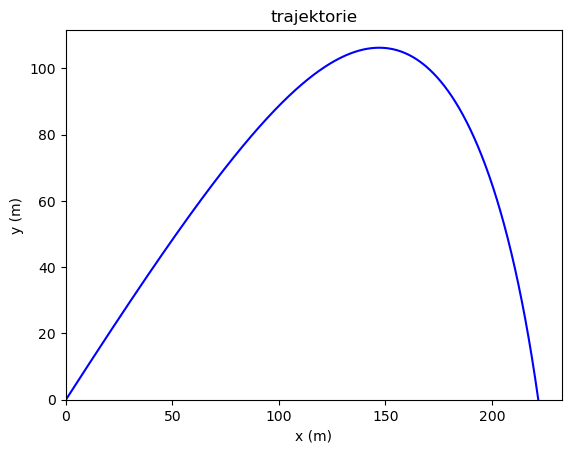

In [10]:
plt.plot(x[0:imax],y[0:imax],c='blue')
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.xlim(0,)
plt.ylim(0,)
plt.title("trajektorie")
plt.show()

V knihovně numpy existuje funkce, která je schopna nalézt nejvyšší hodnotu z daného pole np.argmax a uložit si její index v daném poli

Nalezneme nejvyšší hodnotu v y_data a z té můžeme poté spočítat v jakém čase bylo těleso nejvýše a z toho poté snadno jaká byla doba výstupu nebo sestupu 

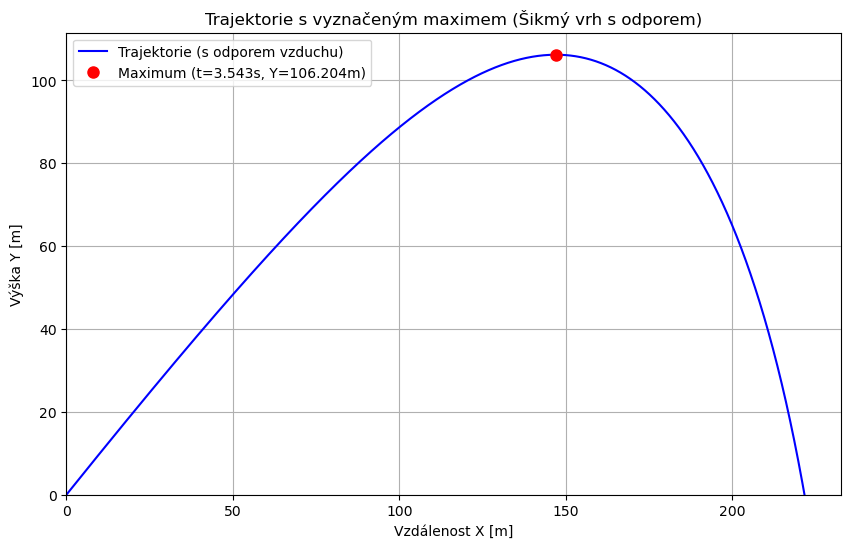

--- Výsledky analýzy času ---
Maximální dosažená výška (Y_max): 106.204 m
Celková doba letu (T_letu): 9.102 s
Doba výstupu k maximu (T_asc): 3.543 s
Doba sestupu z maxima (T_desc): 5.559 s

--- Srovnání časů ---
Zjištění: T_asc < T_desc.
Doba výstupu (3.543 s) je kratší než doba sestupu (5.559 s).


In [12]:
# 1. Omezení polí na skutečně vypočtenou trajektorii (do dopadu na zem)
t_data = t[0:imax]
x_data = x[0:imax]
y_data = y[0:imax]

# 2. Nalezení indexu maximální výšky v poli y_data
# Používáme np.argmax, které najde index nejvyšší hodnoty
max_index_in_slice = np.argmax(y_data)

# 3. Extrakce dat pro maximální bod
t_max = t_data[max_index_in_slice]
x_max = x_data[max_index_in_slice]
y_max = y_data[max_index_in_slice]

# 4. Určení celkové doby letu (poslední časový bod před dopadem)
t_flight = t_data[-1]

# 5. Výpočet časů výstupu a sestupu
t_ascent = t_max
t_descent = t_flight - t_max

# 6. Vykreslení trajektorie s vyznačeným maximem
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, c='blue', label='Trajektorie (s odporem vzduchu)')
# Vykreslení maximálního bodu
plt.plot(x_max, y_max, 'ro', markersize=8, label=f'Maximum (t={t_max:.3f}s, Y={y_max:.3f}m)')
plt.title('Trajektorie s vyznačeným maximem (Šikmý vrh s odporem)')
plt.xlabel('Vzdálenost X [m]')
plt.ylabel('Výška Y [m]')
plt.xlim(0,)
plt.ylim(0,)
plt.grid(True)
plt.legend()
plt.show()

# Výsledky a srovnání
print("--- Výsledky analýzy času ---")
print(f"Maximální dosažená výška (Y_max): {y_max:.3f} m")
print(f"Celková doba letu (T_letu): {t_flight:.3f} s")
print(f"Doba výstupu k maximu (T_asc): {t_ascent:.3f} s")
print(f"Doba sestupu z maxima (T_desc): {t_descent:.3f} s")

# Srovnání
print("\n--- Srovnání časů ---")
if t_ascent < t_descent:
    print(f"Zjištění: T_asc < T_desc.")
    print(f"Doba výstupu ({t_ascent:.3f} s) je kratší než doba sestupu ({t_descent:.3f} s).")
elif t_ascent > t_descent:
    print(f"Zjištění: T_asc > T_desc.")
    print(f"Doba sestupu ({t_descent:.3f} s) je kratší než doba výstupu ({t_ascent:.3f} s).")
else:
    print("Zjištění: T_asc = T_desc. Časy jsou shodné.")

### Vysvětlení asymetrie času letu ($T_{asc} \neq T_{desc}$)

Zjištěné výsledky **doby výstupu ($T_{asc} = 3.543\text{ s}$) jsou kratší** než **doby sestupu ($T_{desc} = 5.559\text{ s}$)**.

**Případ A: Doba výstupu ($T_{asc}$)**

1.  **Směr sil:** Gravitace působí dolů. Síla odporu vzduchu, směřující proti pohybu, má vertikální složku, která rovněž působí dolů.
2.  **Důsledek:** Vertikální síla odporu se **sčítá s gravitací**. Těleso je tedy brzděno zrychlením, které je **větší než samotné $g$**.
3.  **Závěr:** Těleso rychleji ztrácí vertikální rychlost a dosáhne vrcholu **dříve**.

**Případ B: Doba sestupu ($T_{desc}$)**

1.  **Směr sil:** Gravitace působí dolů. Síla odporu vzduchu, směřující proti pohybu, má vertikální složku, která působí **proti gravitaci, tedy nahoru**.
2.  **Důsledek:** Vertikální síla odporu **kompenzuje část gravitace**. Těleso je urychlováno zrychlením, které je **menší než samotné $g$**.
3.  **Závěr:** Tělesu trvá **delší dobu**, než se dostane zpět na zem.

Celková rovnováha sil způsobuje, že **$T_{asc} < T_{desc}$**.